In [2]:
%reload_ext autoreload
%autoreload 2

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append('/workspace/deep_birth_death/src')

from evaluation.regression import get_MLE_regression_div_results, get_clipping_results, plot_errors_MLE, plot_errors_boxplot_MLE, predicted_minus_target_vs_target_MLE

### Generate the results

In [4]:
n_tips = [674, 489, 87]
div_scenarios = ["BD", "HE", "ME", "SAT", "SR", "WW"]

In [18]:
inference_results = dict()

for tip in n_tips:
    inference_results[tip] = dict()
    for div in div_scenarios:
        
        #Load the data
        inference_results[tip][div] = dict()

        file_path = "/workspace/deep_birth_death/MLE/inference_data/" + str(tip) + "/TreePar_inference_" + str(tip) + "_" + div + ".csv"
        #arreglar cuando hagamos para todos
        if div == "SAT":
            file_path = "/workspace/deep_birth_death/MLE/inference_data/" + str(tip) + "/DDD_inference_" + str(tip) + "_" + div + ".csv"
        df = pd.read_csv(file_path)
        
        if div == "BD":
            y_test = df[["real_a0", "real_r0"]].to_numpy()
            y_pred_raw = df[["estimated_a", "estimated_r"]].to_numpy()
            
            min_value = np.array([0.01, 0.01])            
            max_value = np.array([0.5, 4])                        
            
        elif div == "HE":
            y_test = df[["real_a0", "real_r0"]].to_numpy()
            y_pred_raw = df[["estimated_a", "estimated_r"]].to_numpy()
            
            min_value = np.array([0.8, 0.01])            
            max_value = np.array([0.9, 4])   
                        
        elif div == "SAT":
            y_test = df[["real_lambda"]].to_numpy()
            y_pred_raw = df[["estimated_lambda"]].to_numpy()
            
            min_value = np.array([0.01])            
            max_value = np.array([4])  
  
            
        elif div == "ME":
            y_test = df[["real_a0", "real_r0", "real_frac_1", "real_t"]].to_numpy()
            y_pred_raw = df[["estimated_a_me", "estimated_r_me", "estimated_frac_1_me", "estimated_time_me"]].to_numpy()
          
            min_value = np.array([0.3, 0.01, 0.1, 3])            
            max_value = np.array([0.8, 1, 0.3, 20]) 
        
        elif div == "SR":
            y_test = df[["real_a0", "real_a1","real_r0", "real_r1", "real_t"]].to_numpy()
            y_pred_raw = df[["estimated_a0", "estimated_a1", "estimated_r0", "estimated_r1", "estimated_t"]].to_numpy()
        
            min_value = np.array([0.05, 0.55, 0.25, 0.01, 3])            
            max_value = np.array([0.5, 0.95, 1.99, 1, 20])         
        
        else: 
            y_test = df[["real_a0", "real_a1","real_r0", "real_r1", "real_t"]].to_numpy()
            y_pred_raw = df[["estimated_a0", "estimated_a1", "estimated_r0", "estimated_r1", "estimated_t"]].to_numpy()
            
            min_value = np.array([1.3, 0.25, -0.2, 0.5, 3])            
            max_value = np.array([2, 0.6, -0.01, 1.5, 20])              
        

        
        #Clip the values
        y_pred = np.clip(y_pred_raw, min_value, max_value)
        precentage_clipped = (np.sum(y_pred_raw != y_pred, axis=0)/y_pred_raw.shape[0])*100
        
        clipped_below = (np.sum(y_pred_raw < min_value, axis=0) / y_pred_raw.shape[0]) * 100
        clipped_above = (np.sum(y_pred_raw > max_value, axis=0) / y_pred_raw.shape[0]) * 100
    
        #Estimate the erros
        mae = np.mean(np.abs(y_test - y_pred), axis=0)
        mre = np.mean(np.abs((y_test - y_pred) / y_test), axis=0)
        
        raw_error = y_test - y_pred
        abs_error = abs(y_test - y_pred)
        
        #Save the results
        inference_results[tip][div]["MAE"] = mae
        inference_results[tip][div]["MRE"] = mre       
        inference_results[tip][div]["raw_error"] = raw_error
        inference_results[tip][div]["abs_error"] = abs_error   
        
        inference_results[tip][div]["clipped_perc"] = precentage_clipped
        inference_results[tip][div]["clipped_below"] = clipped_below        
        inference_results[tip][div]["clipped_above"] = clipped_above   
        
        inference_results[tip][div]["y_test"] = y_test  
        

### MAE  for each div and tip combination

In [6]:
for tip in n_tips: 
    print("----------- Size is " + str(tip) + " -----------\n")
    for div in div_scenarios: 
        print("-----------Div_scenario is " + div +" -----------")
        mae = get_MLE_regression_div_results(inference_results, tip, div, "MAE")
        print(mae, "\n")

----------- Size is 674 -----------

-----------Div_scenario is BD -----------
            a         r
MAE  0.068798  0.116612 

-----------Div_scenario is HE -----------
            a         r
MAE  0.019128  0.246233 

-----------Div_scenario is ME -----------
            a         r      frac     time
MAE  0.057415  0.033818  0.058359  0.90885 

-----------Div_scenario is SAT -----------
     lambda 0
MAE  0.063117 

-----------Div_scenario is SR -----------
           a0        a1       r0        r1      time
MAE  0.083698  0.220393  0.04994  0.028545  1.391276 

-----------Div_scenario is WW -----------
           a0        a1        r0        r1      time
MAE  0.211694  0.162091  0.035051  0.140724  0.335648 

----------- Size is 489 -----------

-----------Div_scenario is BD -----------
            a         r
MAE  0.080543  0.151034 

-----------Div_scenario is HE -----------
            a         r
MAE  0.026043  0.267831 

-----------Div_scenario is ME -----------
           

### MRE  for each div and tip combination

In [7]:
for tip in n_tips: 
    print("----------- Size is " + str(tip) + " -----------\n")
    for div in div_scenarios: 
        print("-----------Div_scenario is " + div +" -----------")
        mre = get_MLE_regression_div_results(inference_results, tip, div, "MRE")
        print(mre, "\n")

----------- Size is 674 -----------

-----------Div_scenario is BD -----------
            a         r
MRE  0.499062  0.058294 

-----------Div_scenario is HE -----------
            a         r
MRE  0.022491  0.124689 

-----------Div_scenario is ME -----------
            a         r     frac      time
MRE  0.125123  0.101621  0.28705  0.093647 

-----------Div_scenario is SAT -----------
     lambda 0
MRE  0.034265 

-----------Div_scenario is SR -----------
           a0        a1       r0        r1      time
MRE  0.365991  0.320456  0.08372  0.742363  0.155439 

-----------Div_scenario is WW -----------
           a0        a1        r0        r1     time
MRE  0.121991  0.362375  0.496565  0.141696  0.02812 

----------- Size is 489 -----------

-----------Div_scenario is BD -----------
            a         r
MRE  0.735357  0.074505 

-----------Div_scenario is HE -----------
            a         r
MRE  0.030756  0.164845 

-----------Div_scenario is ME -----------
            a

### Clipping  for each div and tip combination

In [8]:
for tip in n_tips:
    print(f"\n----------- Size is {tip} -----------")
    for div in div_scenarios:
        print(f"--- {div} ---")
        df_tot, df_below, df_above = get_clipping_results(inference_results, tip, div)
        print(df_tot)
        print(df_below)
        print(df_above, "\n")


----------- Size is 674 -----------
--- BD ---
              a    r
Clipped %  17.0  1.0
           a    r
Below %  9.0  0.0
           a    r
Above %  8.0  1.0 

--- HE ---
              a    r
Clipped %  21.0  5.0
           a    r
Below %  7.0  0.0
            a    r
Above %  14.0  5.0 

--- ME ---
              a    r  frac  time
Clipped %  16.0  0.0  30.0   5.0
            a    r  frac  time
Below %  13.0  0.0  24.0   2.0
           a    r  frac  time
Above %  3.0  0.0   6.0   3.0 

--- SAT ---
           lambda 0
Clipped %       3.0
         lambda 0
Below %       1.0
         lambda 0
Above %       2.0 

--- SR ---
                  a0         a1   r0    r1  time
Clipped %  28.571429  85.714286  0.0  50.0   0.0
                a0         a1   r0    r1  time
Below %  28.571429  35.714286  0.0  50.0   0.0
          a0    a1   r0   r1  time
Above %  0.0  50.0  0.0  0.0   0.0 

--- WW ---
             a0    a1    r0    r1  time
Clipped %  50.0  75.0  58.0  10.0   1.0
           a0 

### Plots with the raw errors


----------- Size is 674 -----------


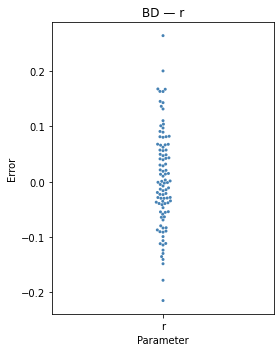

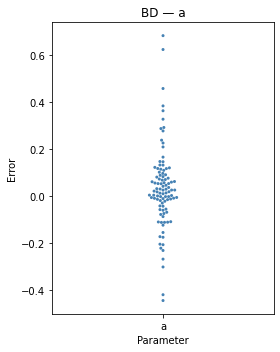

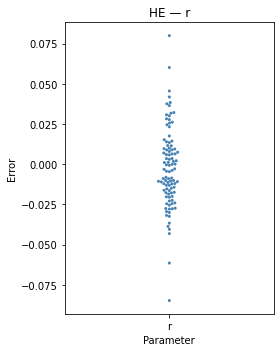

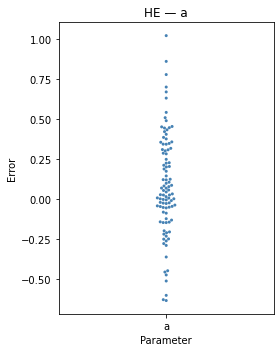

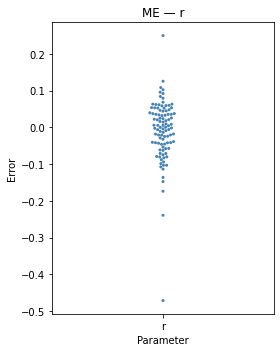

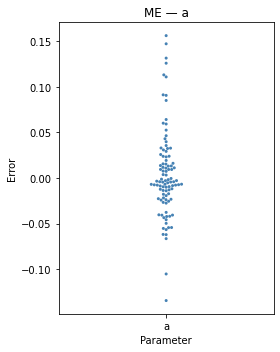

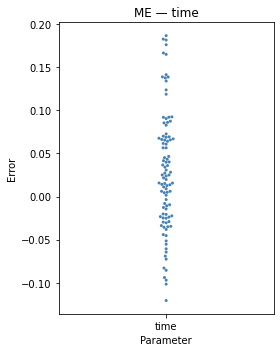

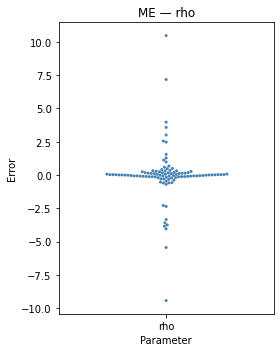

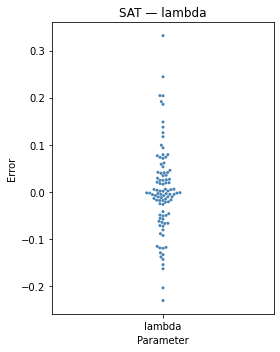

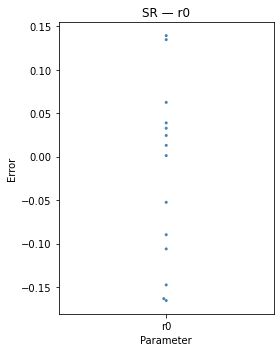

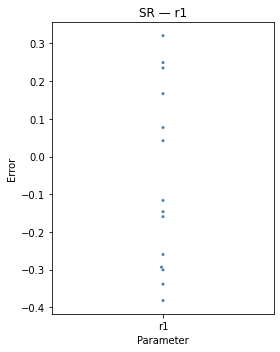

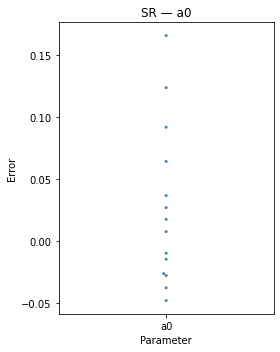

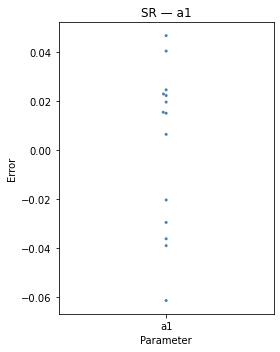

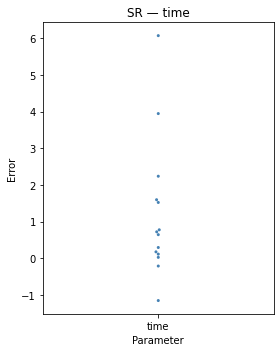

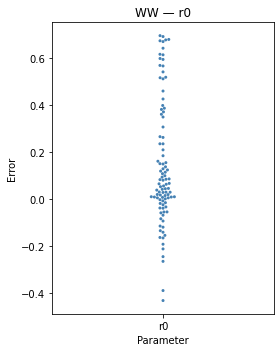

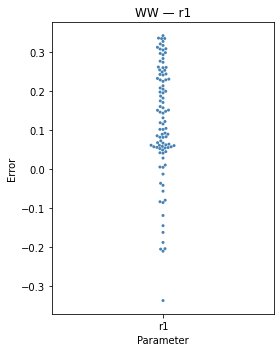

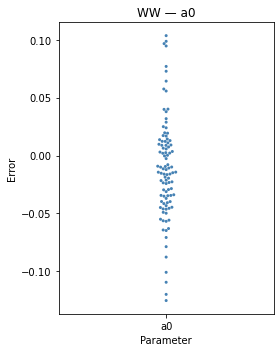

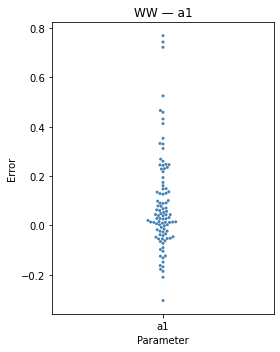

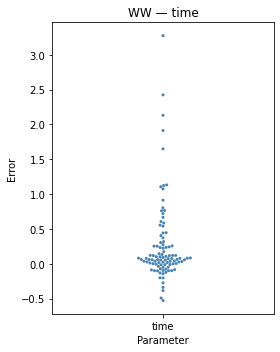


----------- Size is 489 -----------


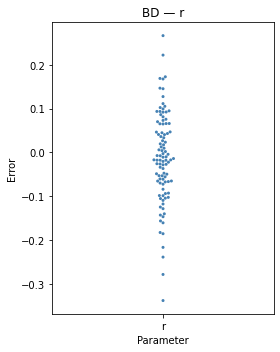

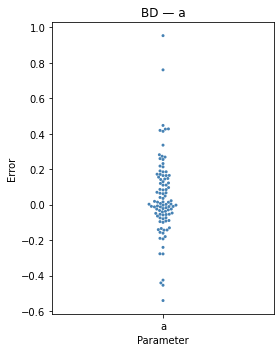

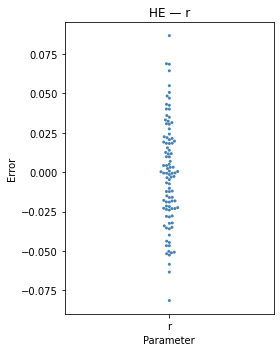

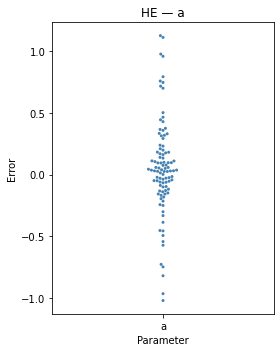

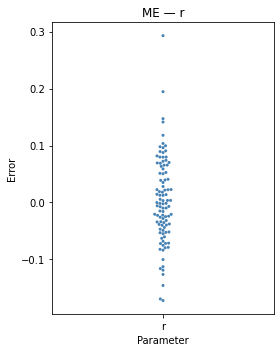

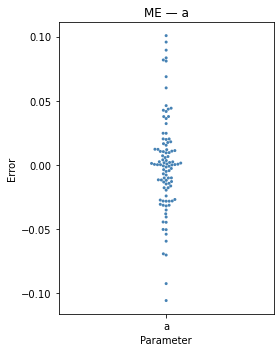

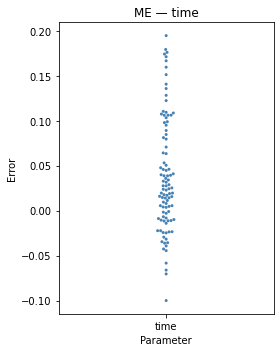

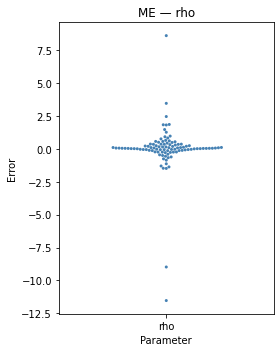

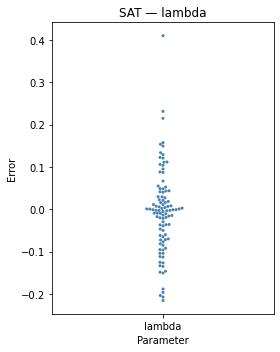

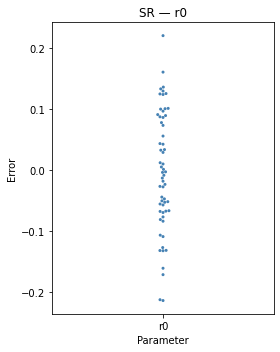

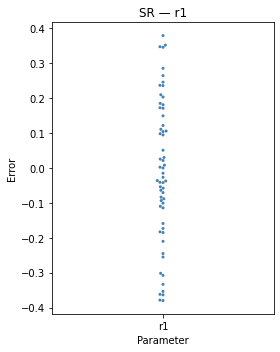

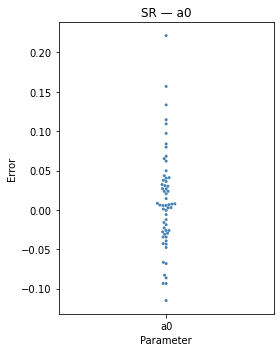

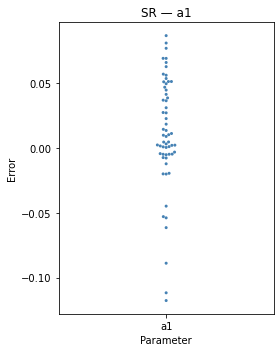

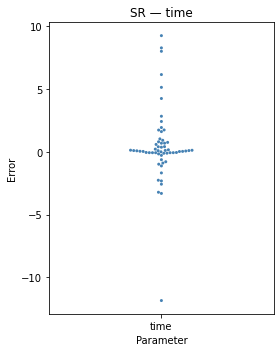

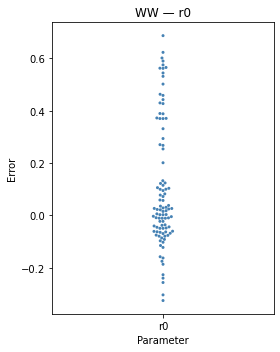

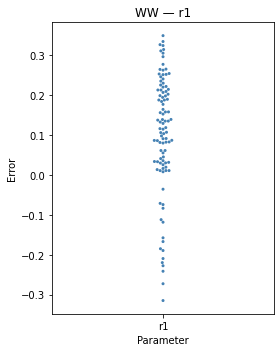

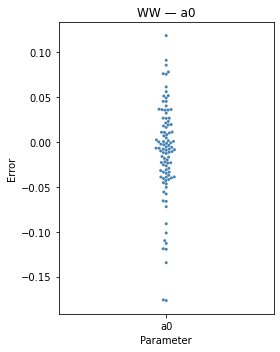

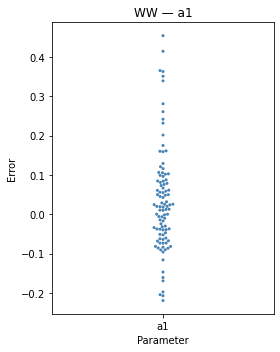

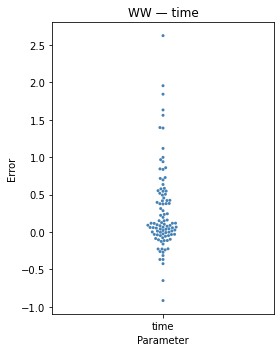


----------- Size is 87 -----------


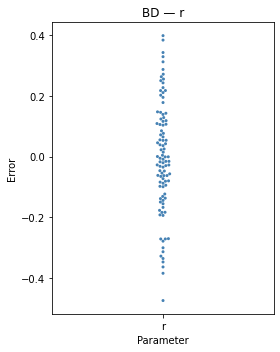

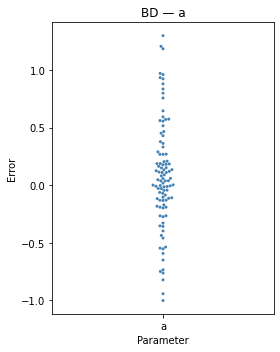

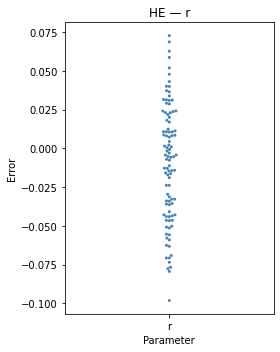

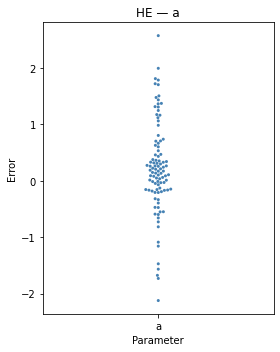

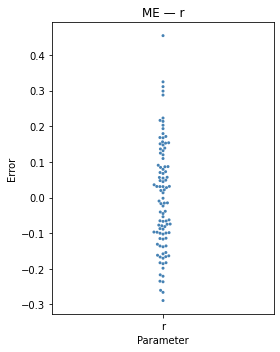

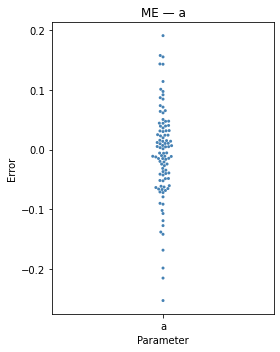

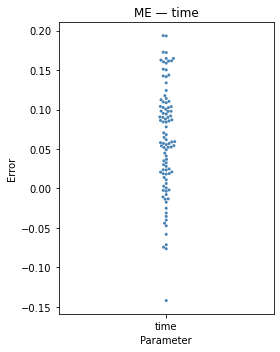

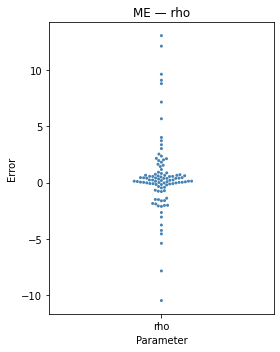

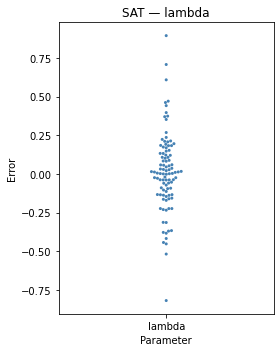

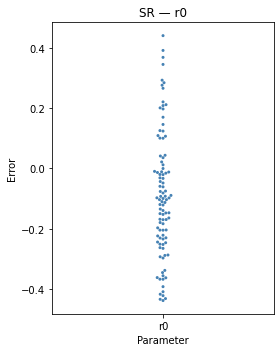

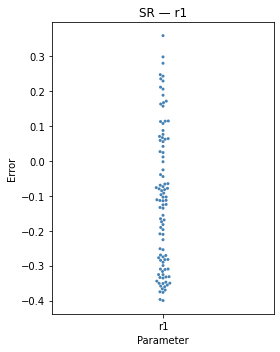

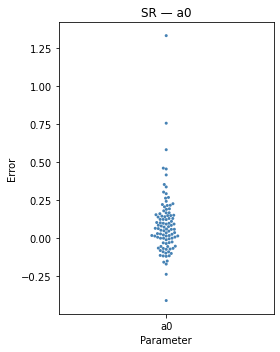

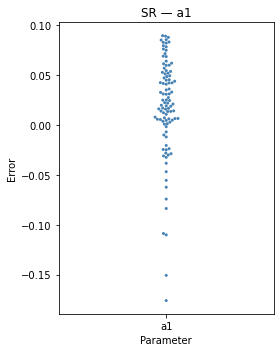

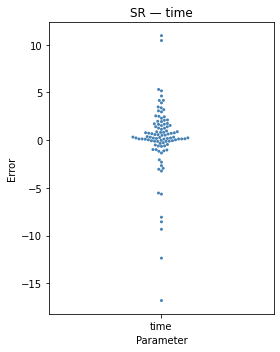

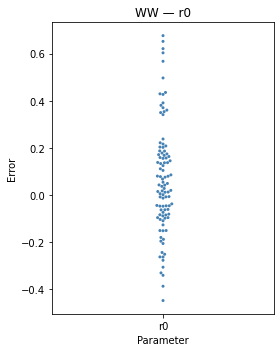

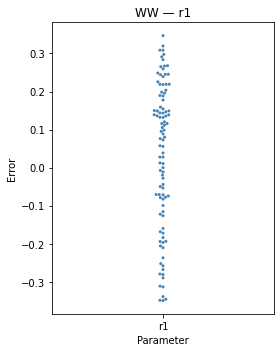

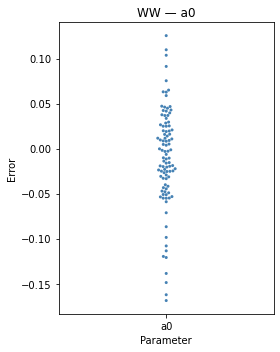

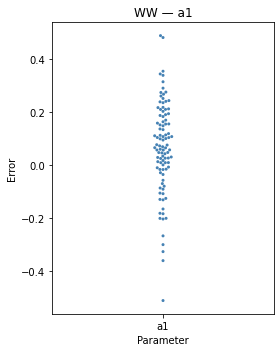

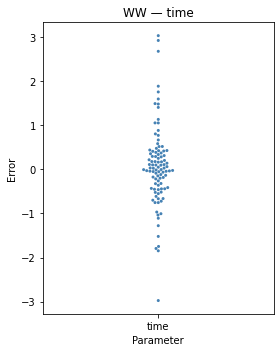

In [10]:
for tip in n_tips:
    print(f"\n----------- Size is {tip} -----------")
    for div in div_scenarios:
        plot_errors_MLE(inference_results, tip, div)       


----------- Size is 674 -----------


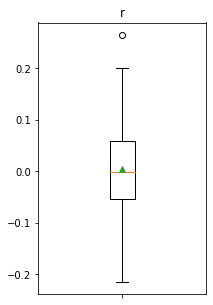

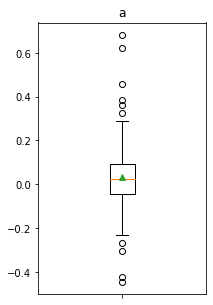

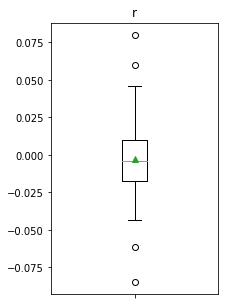

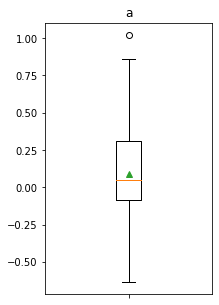

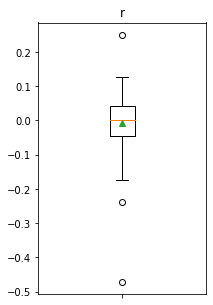

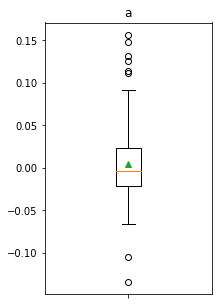

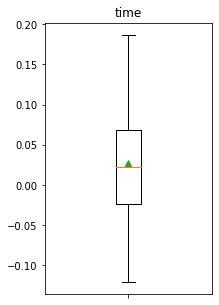

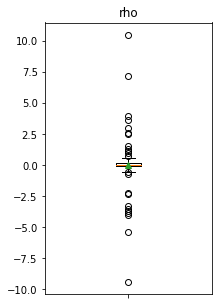

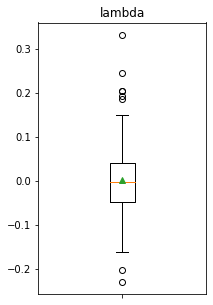

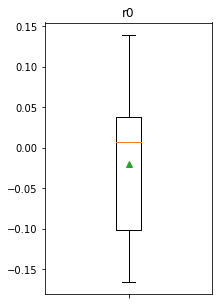

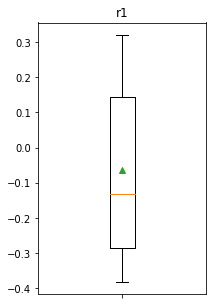

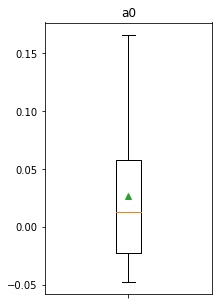

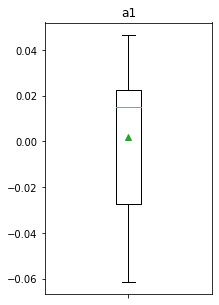

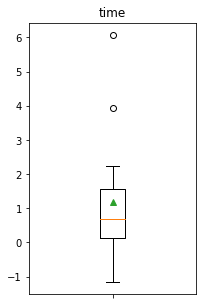

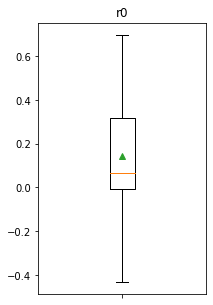

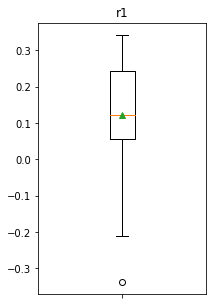

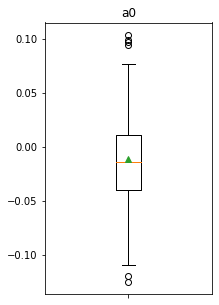

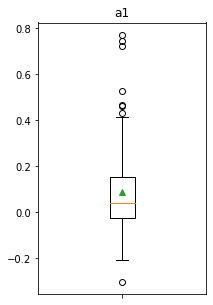

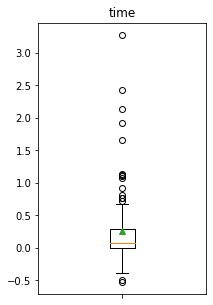


----------- Size is 489 -----------


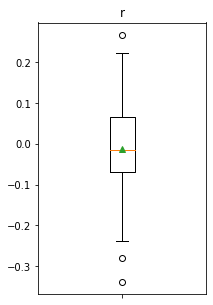

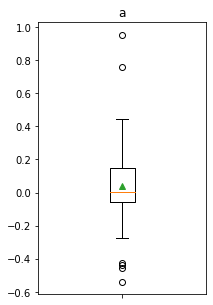

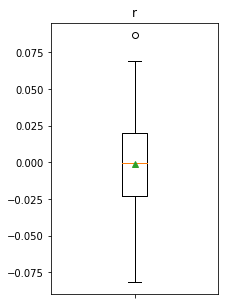

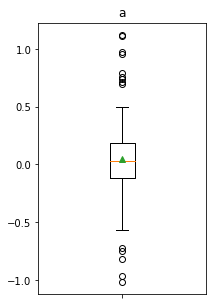

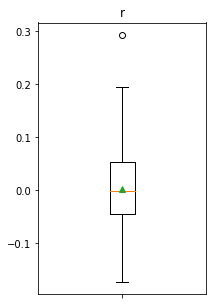

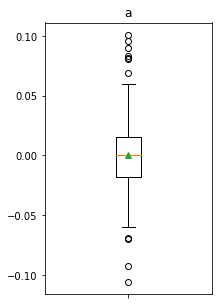

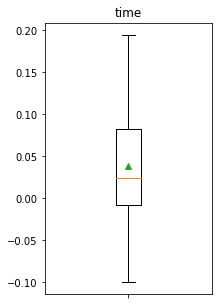

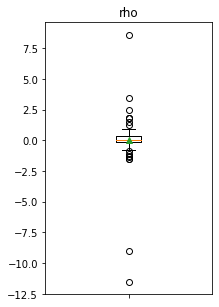

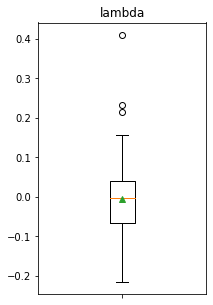

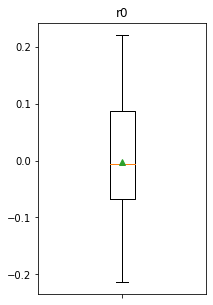

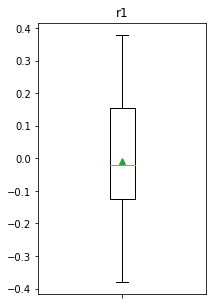

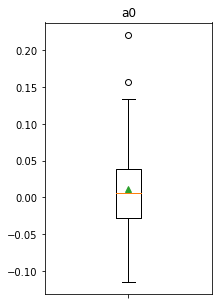

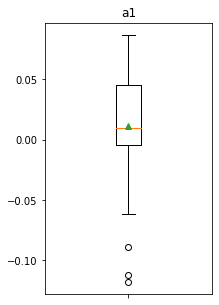

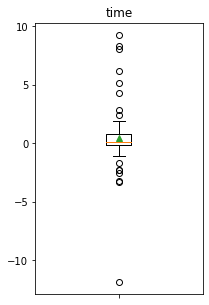

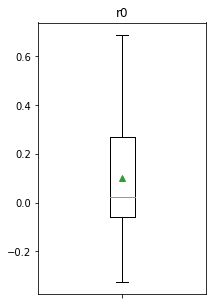

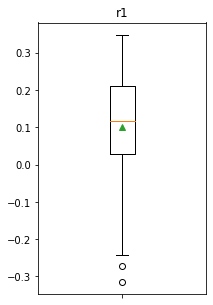

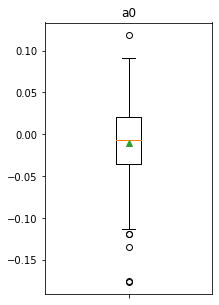

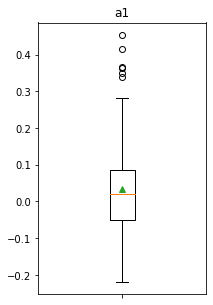

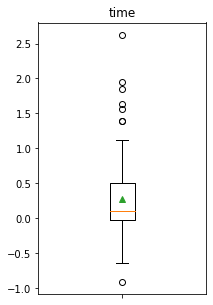


----------- Size is 87 -----------


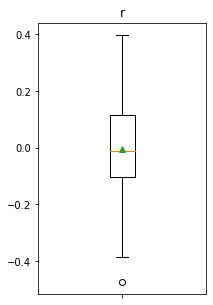

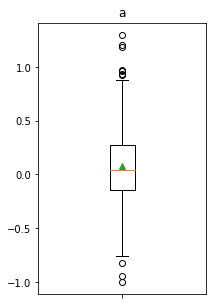

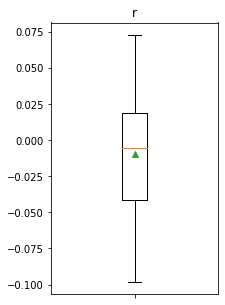

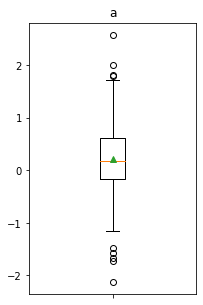

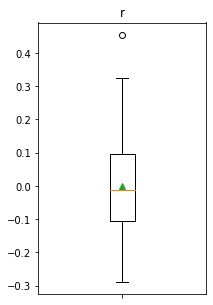

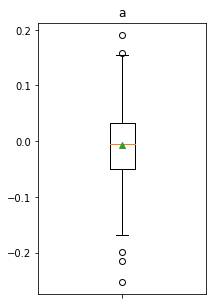

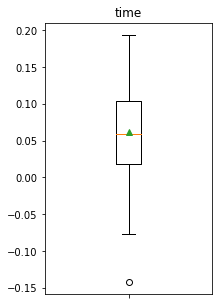

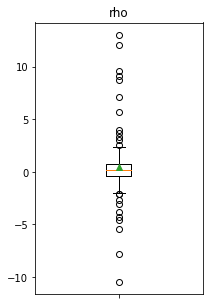

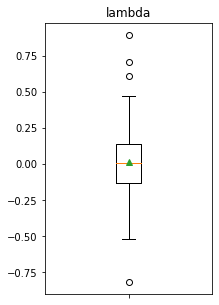

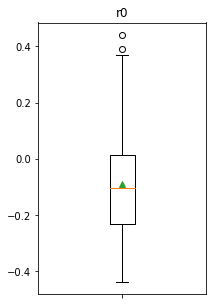

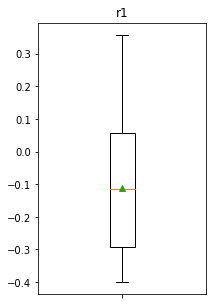

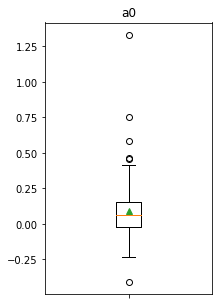

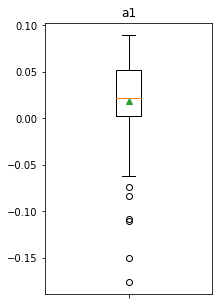

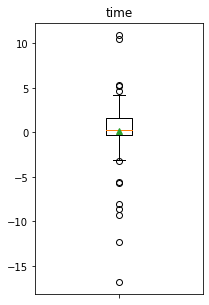

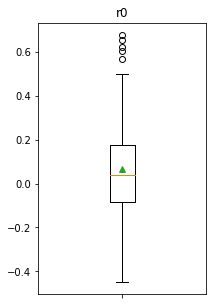

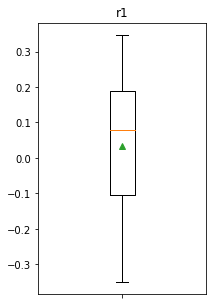

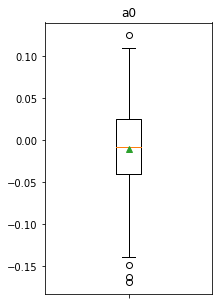

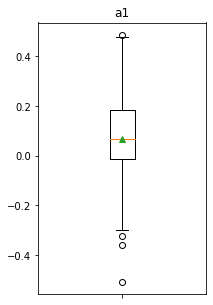

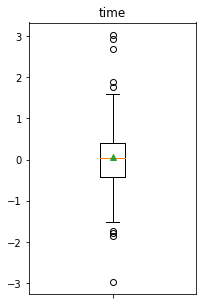

In [14]:
for tip in n_tips:
    print(f"\n----------- Size is {tip} -----------")
    for div in div_scenarios:
        plot_errors_boxplot_MLE(inference_results, tip, div)      

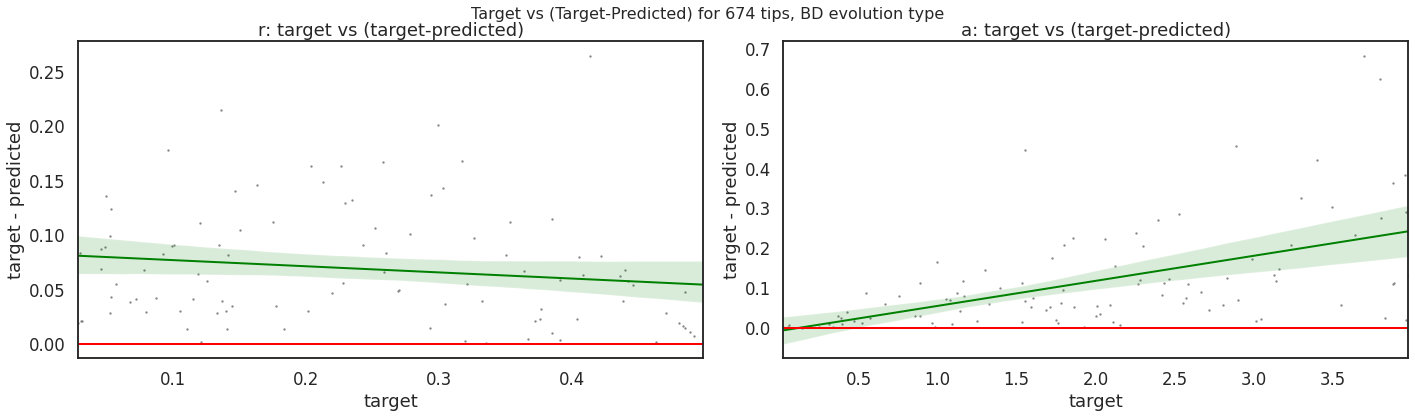

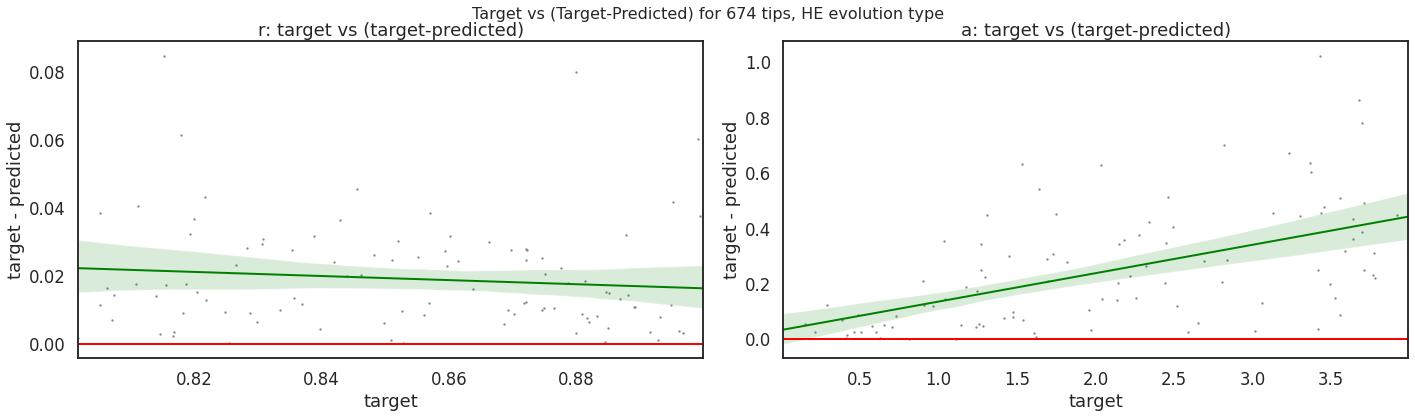

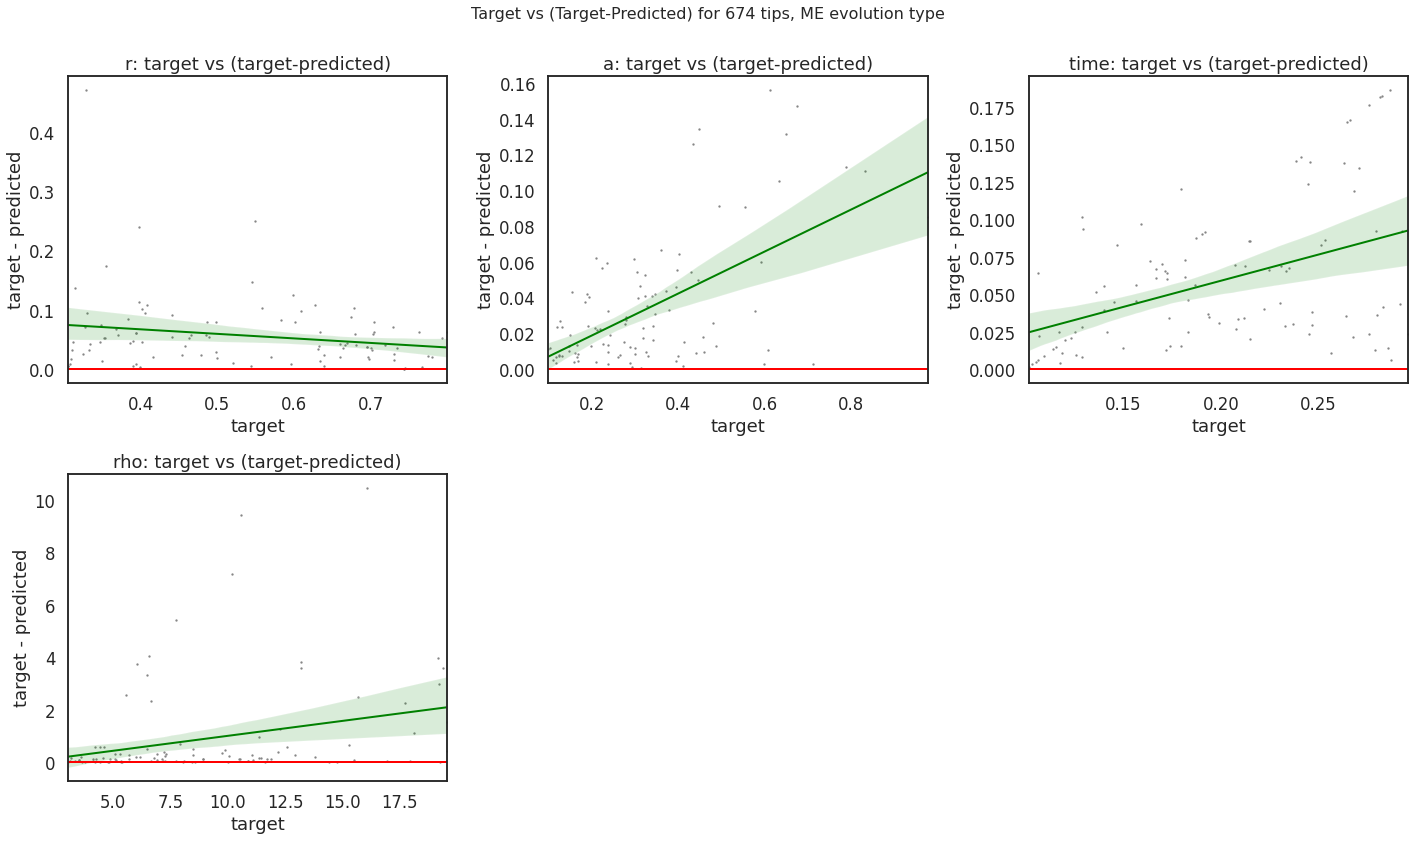

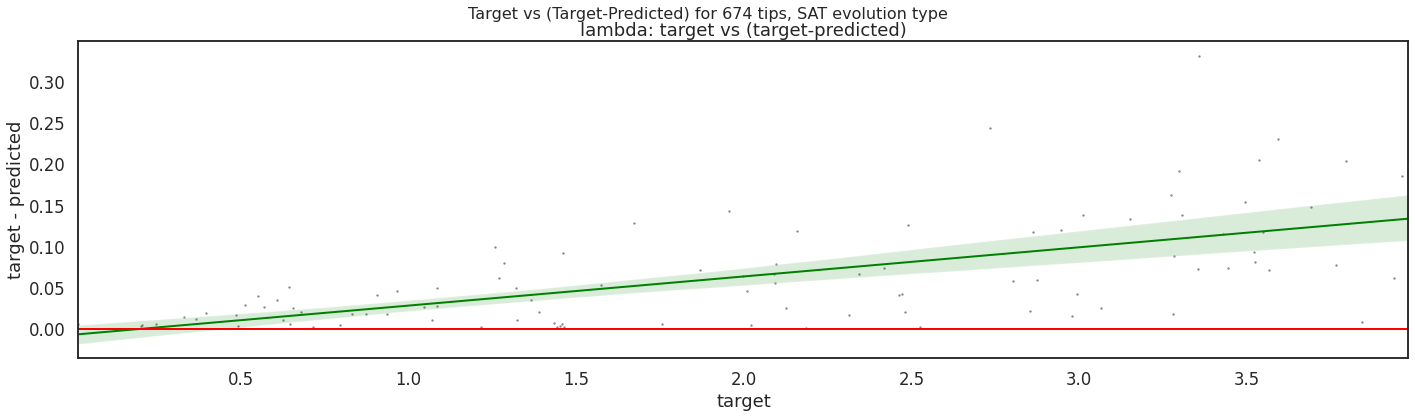

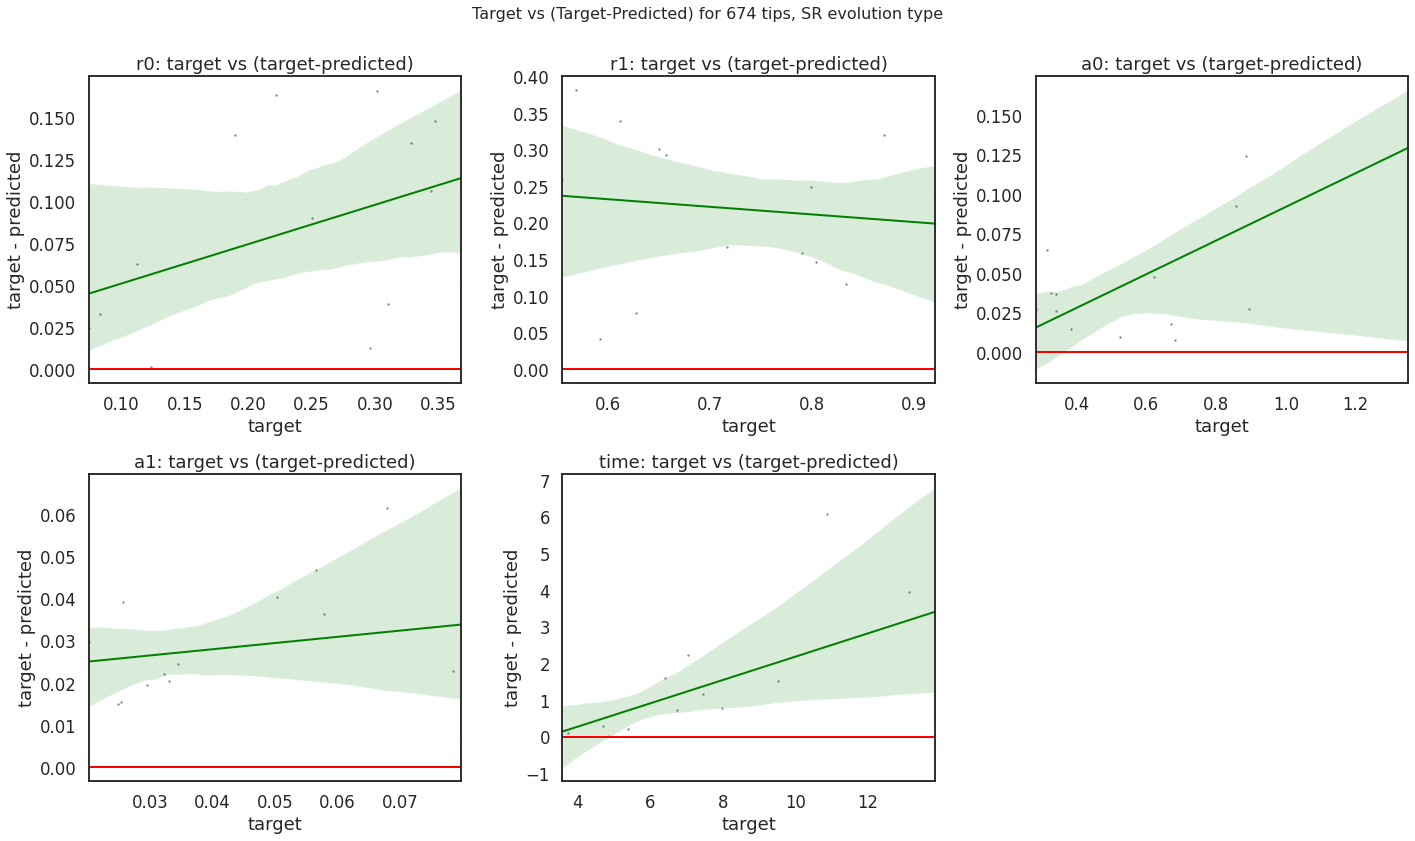

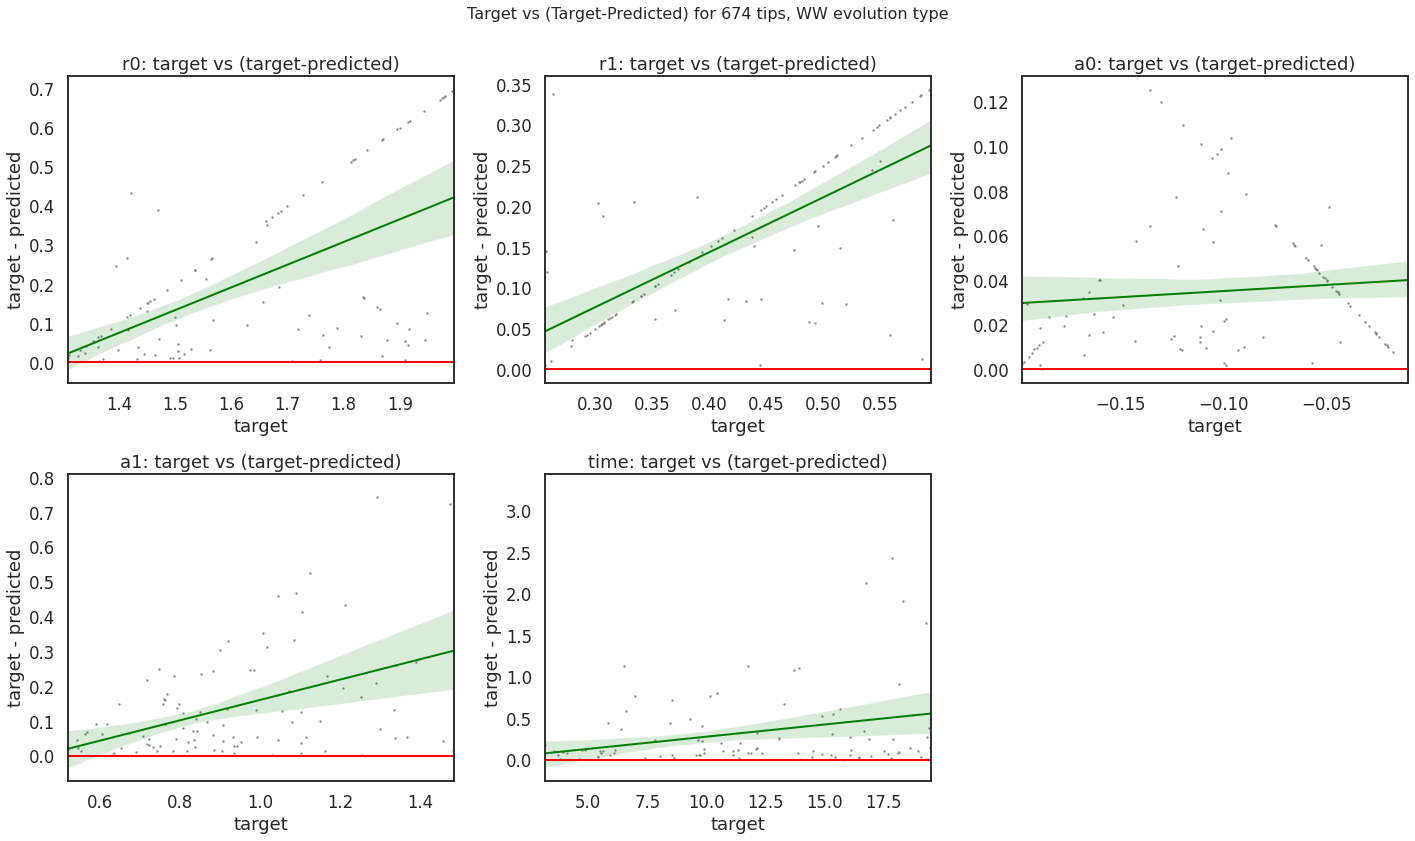

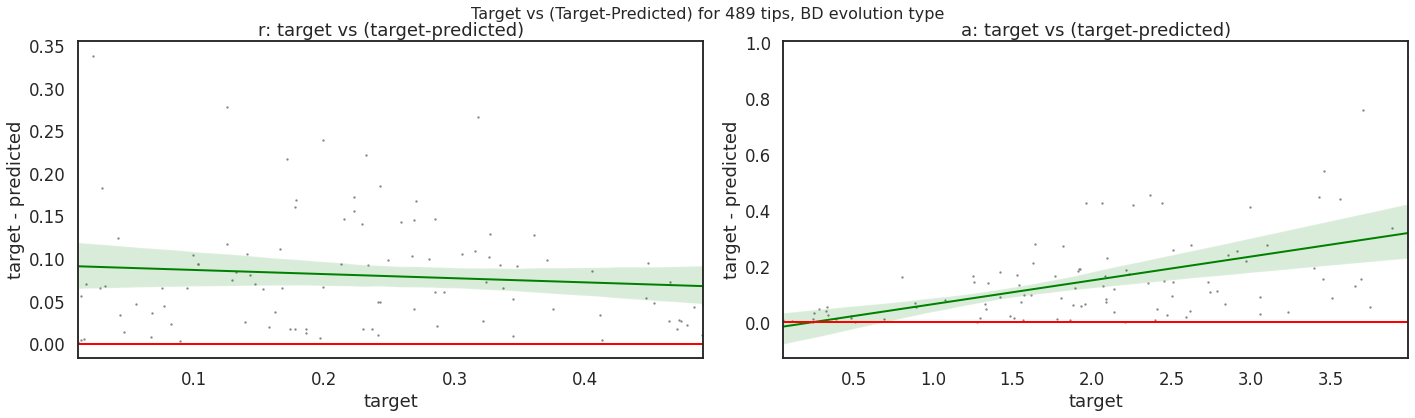

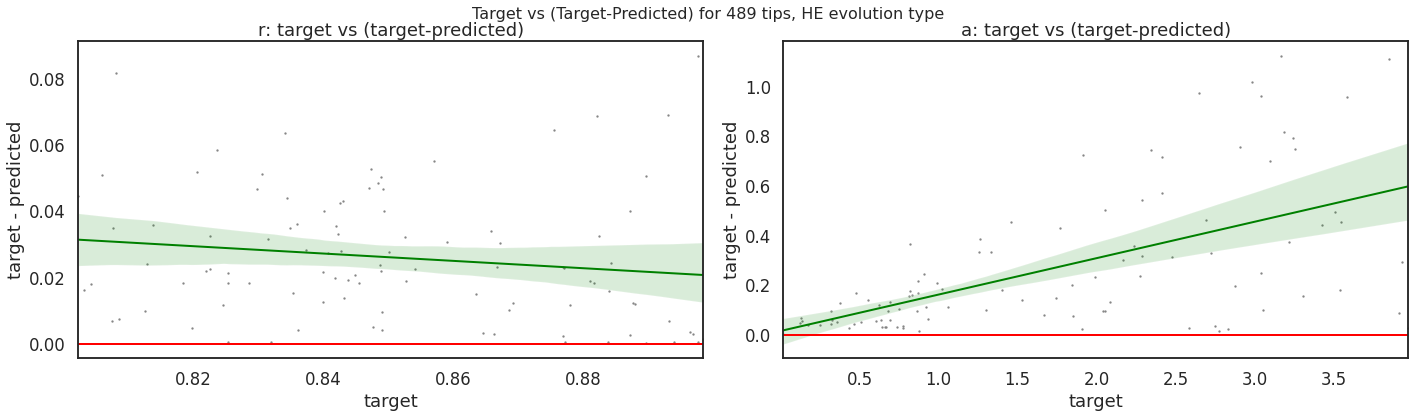

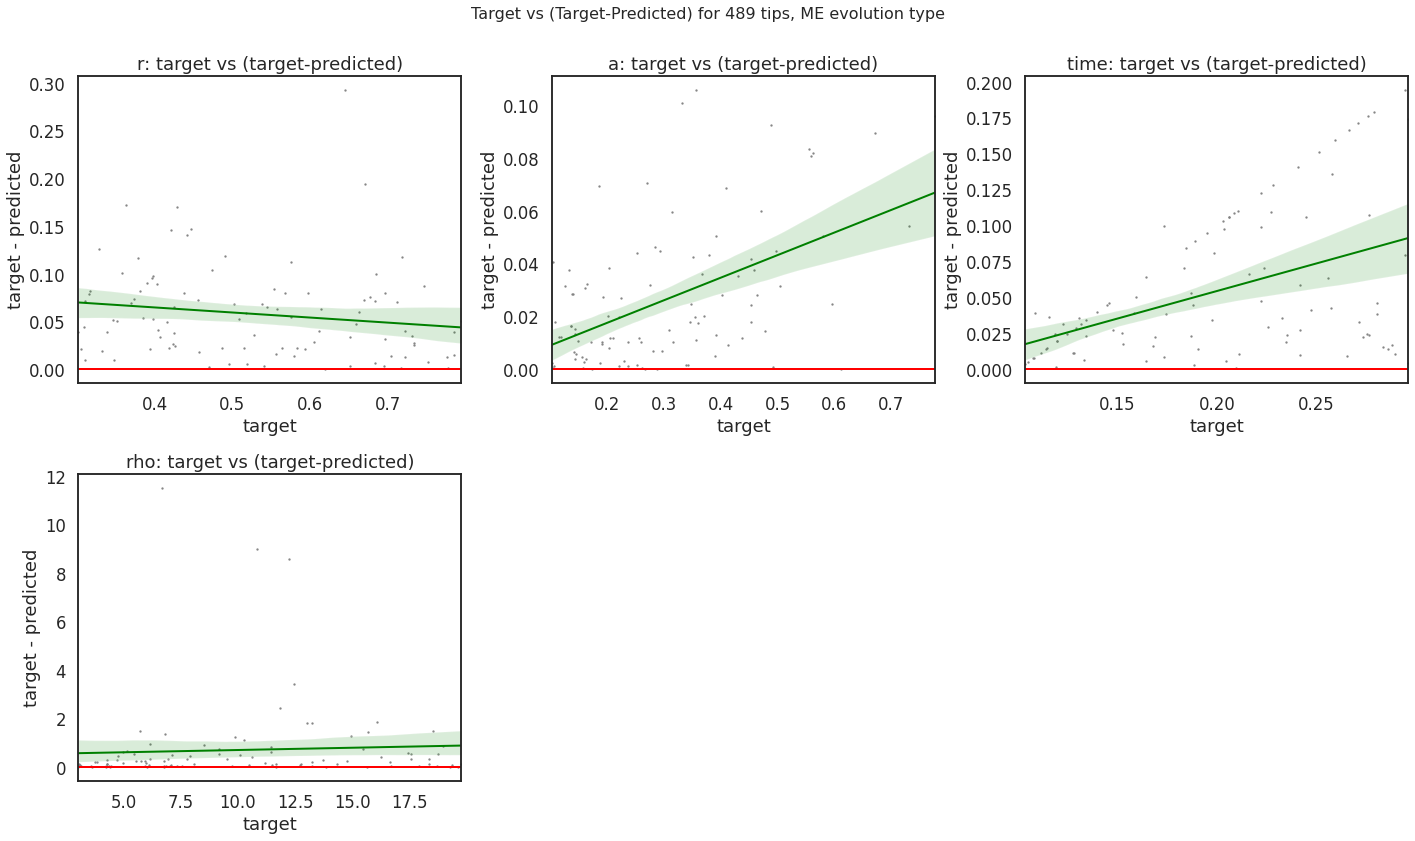

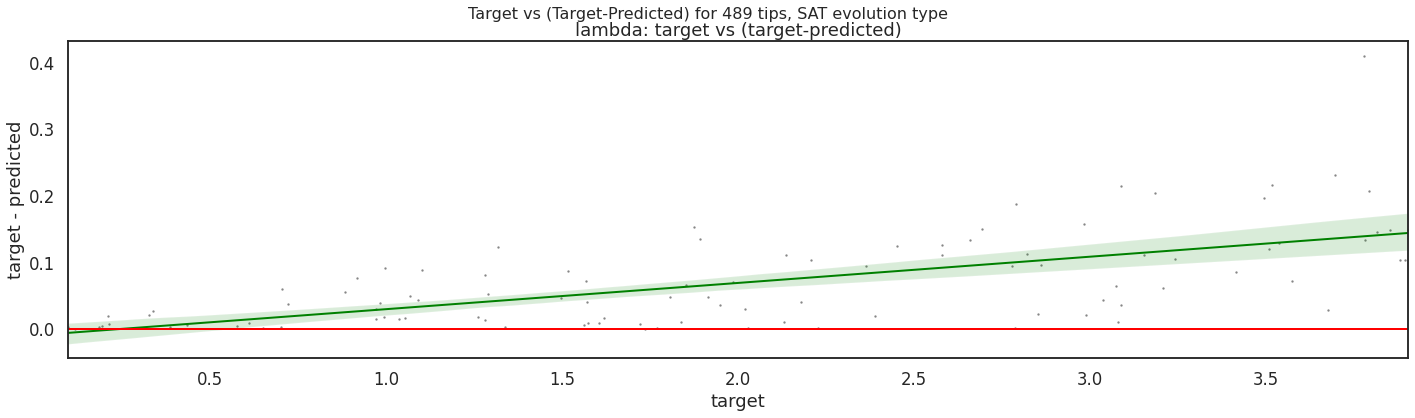

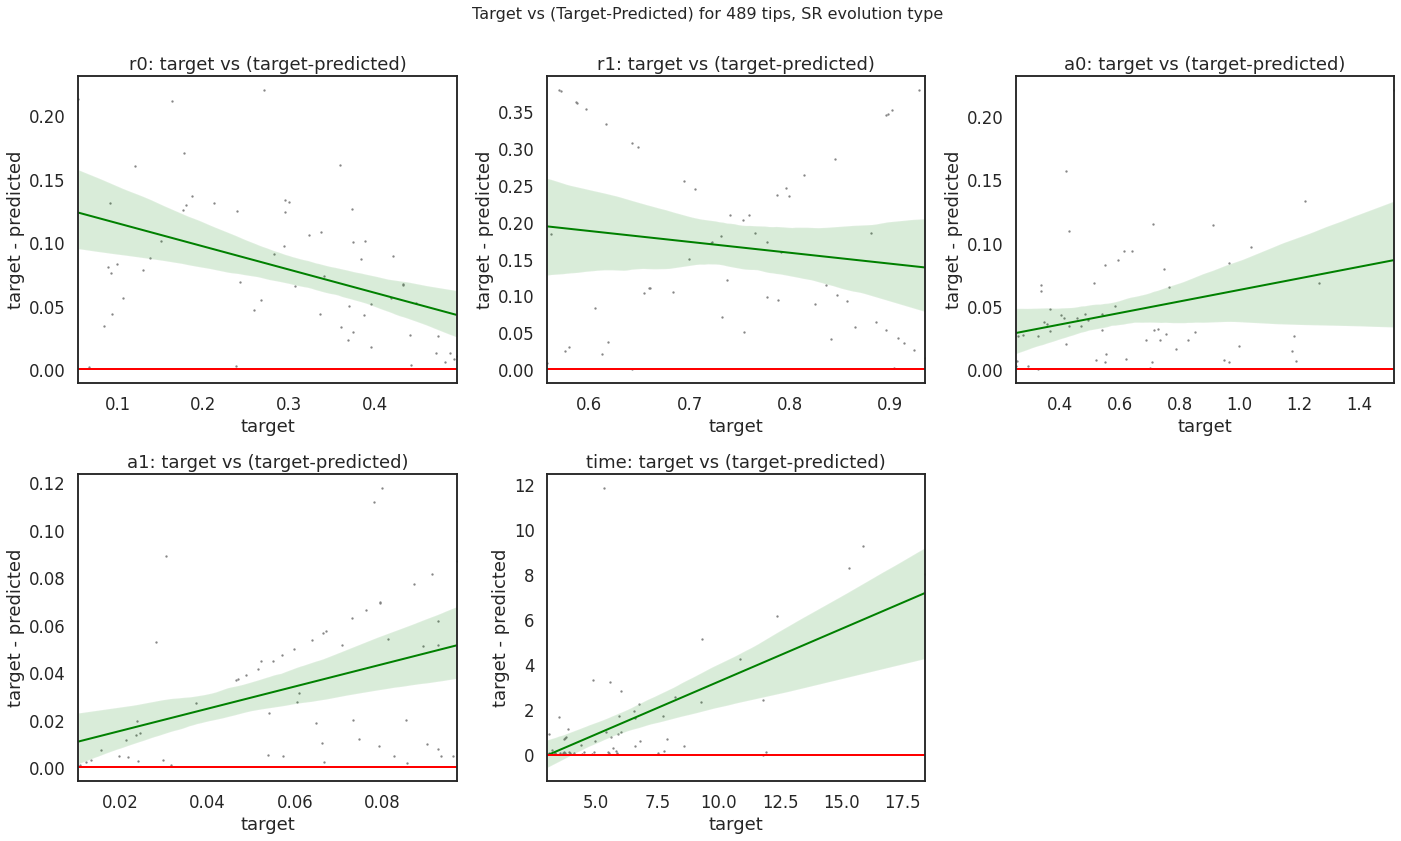

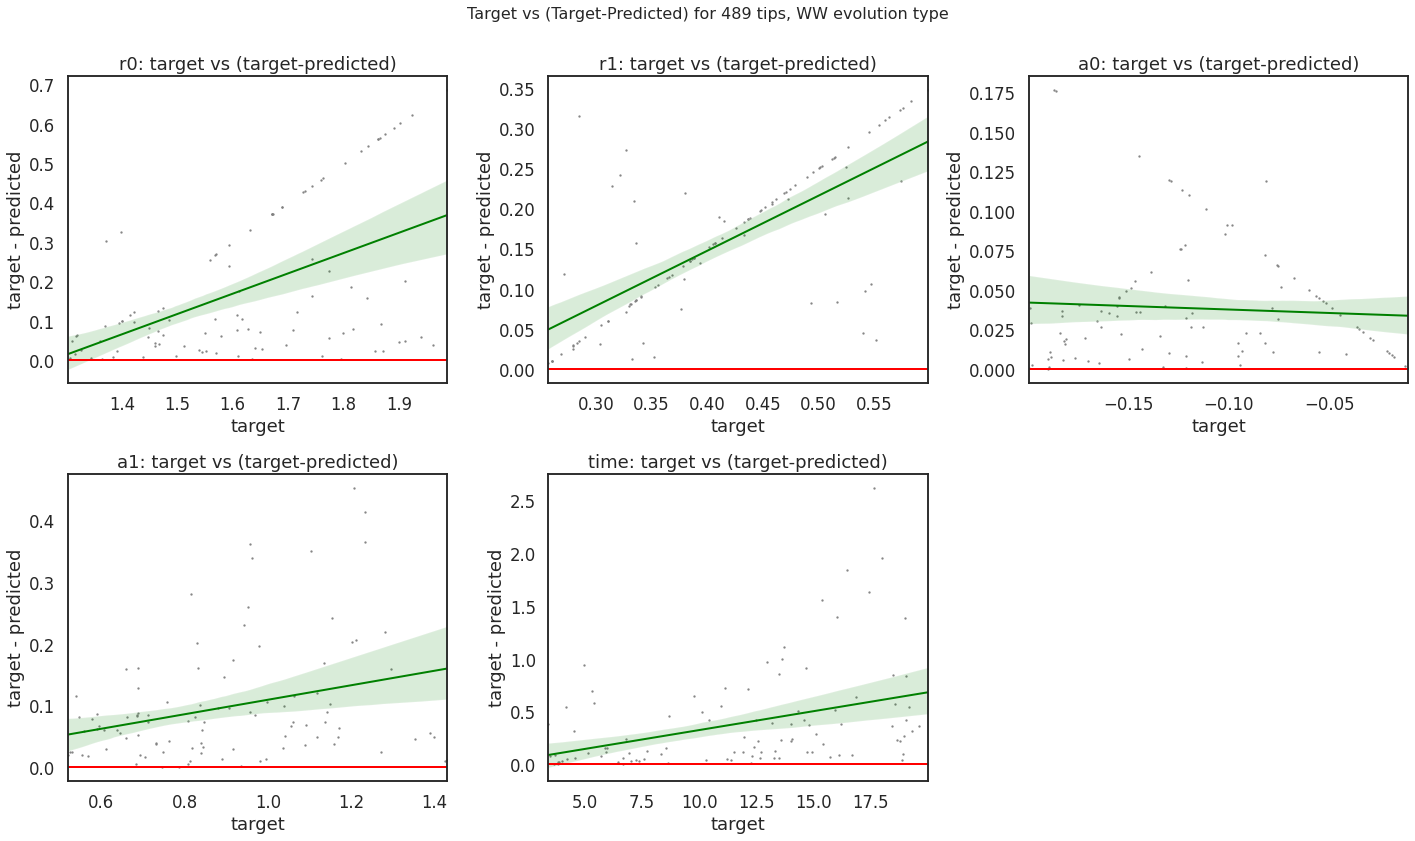

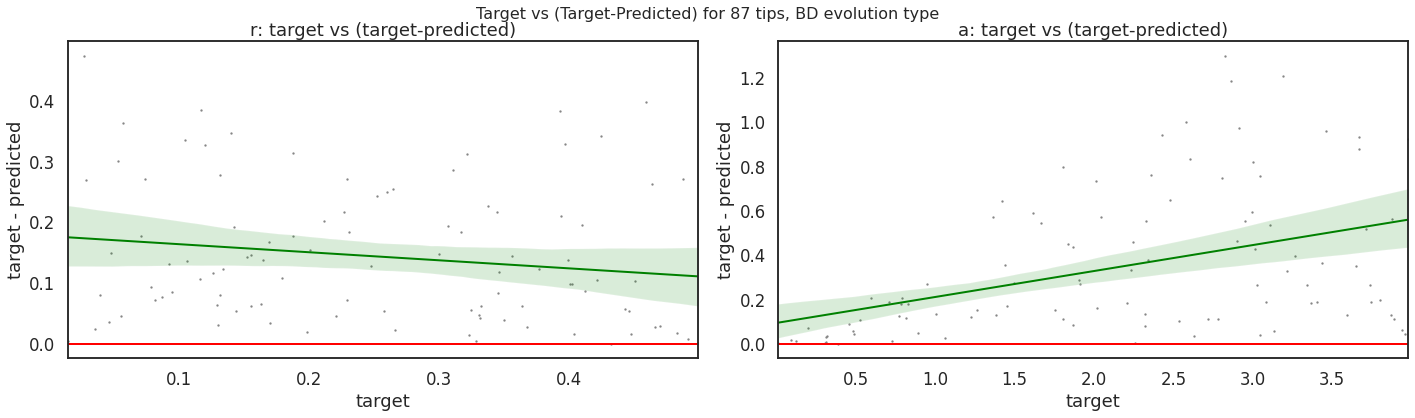

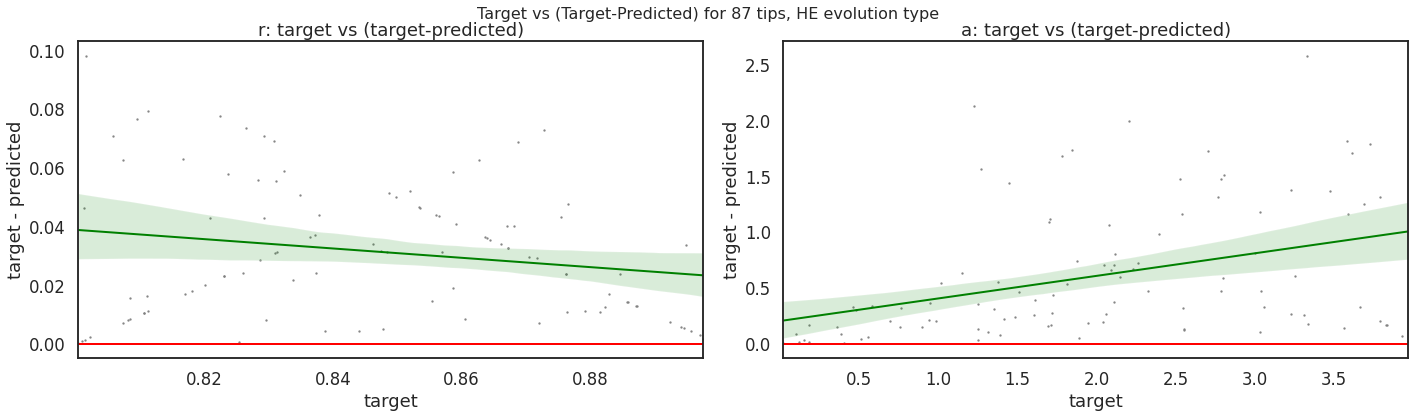

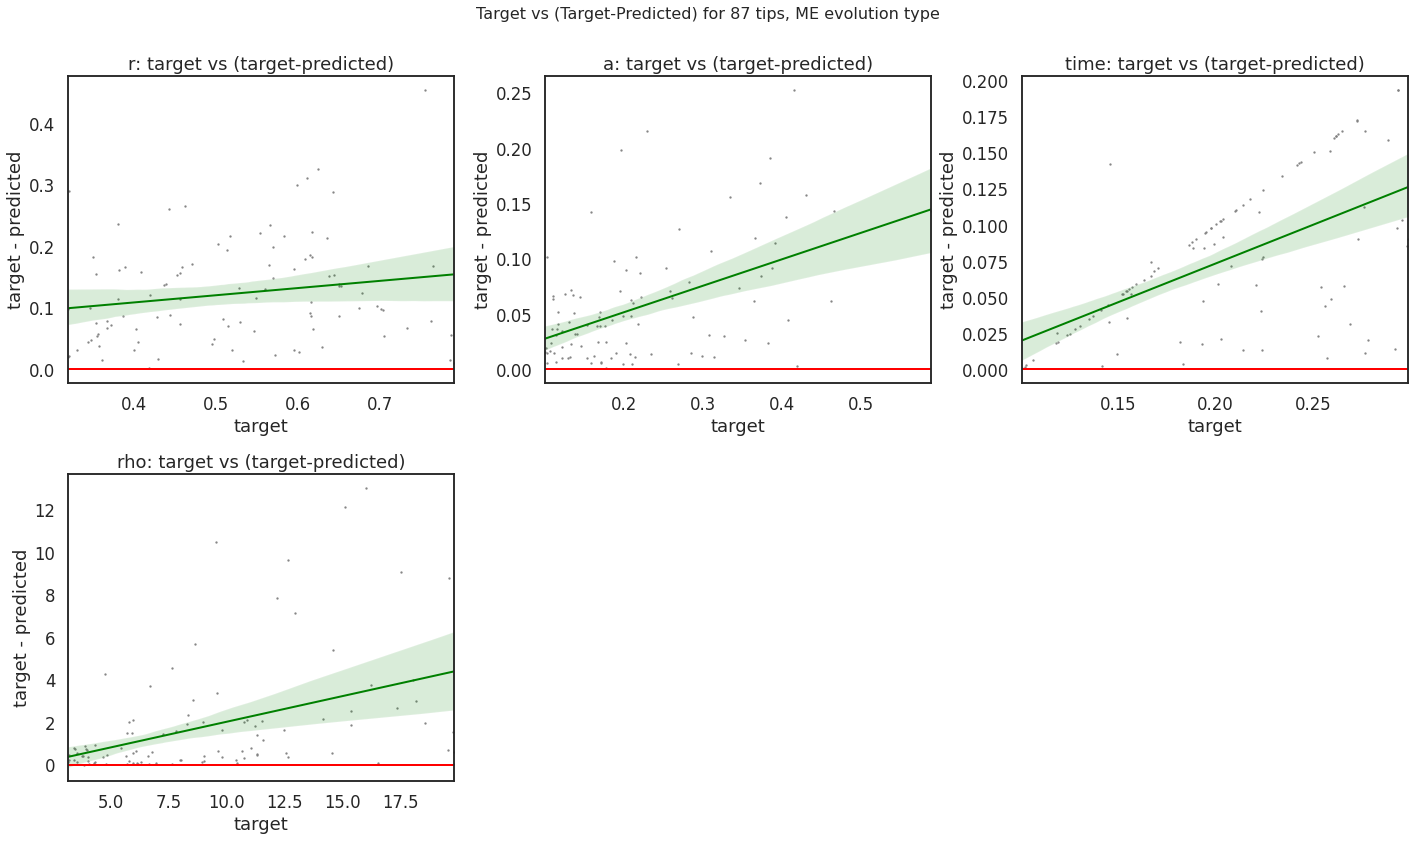

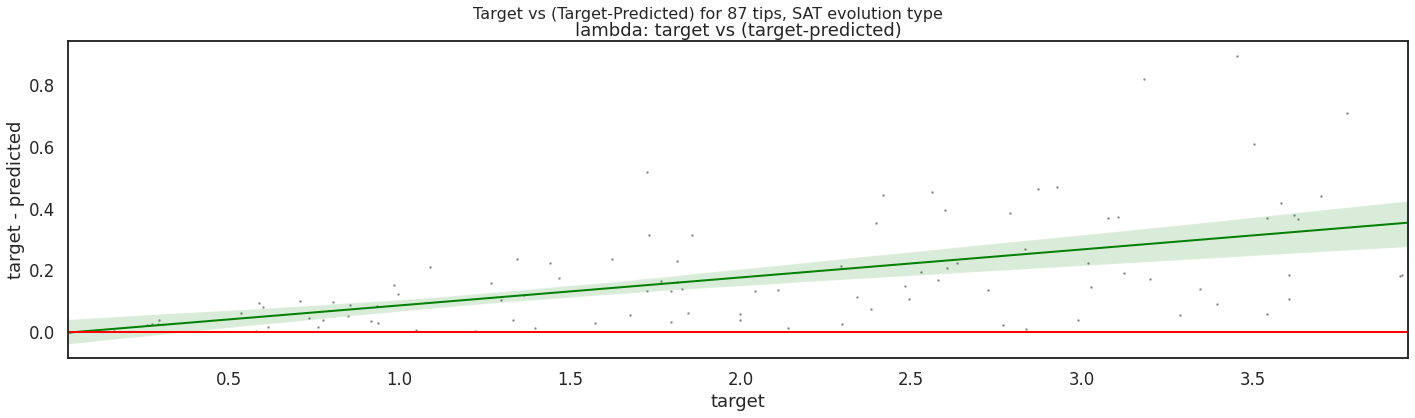

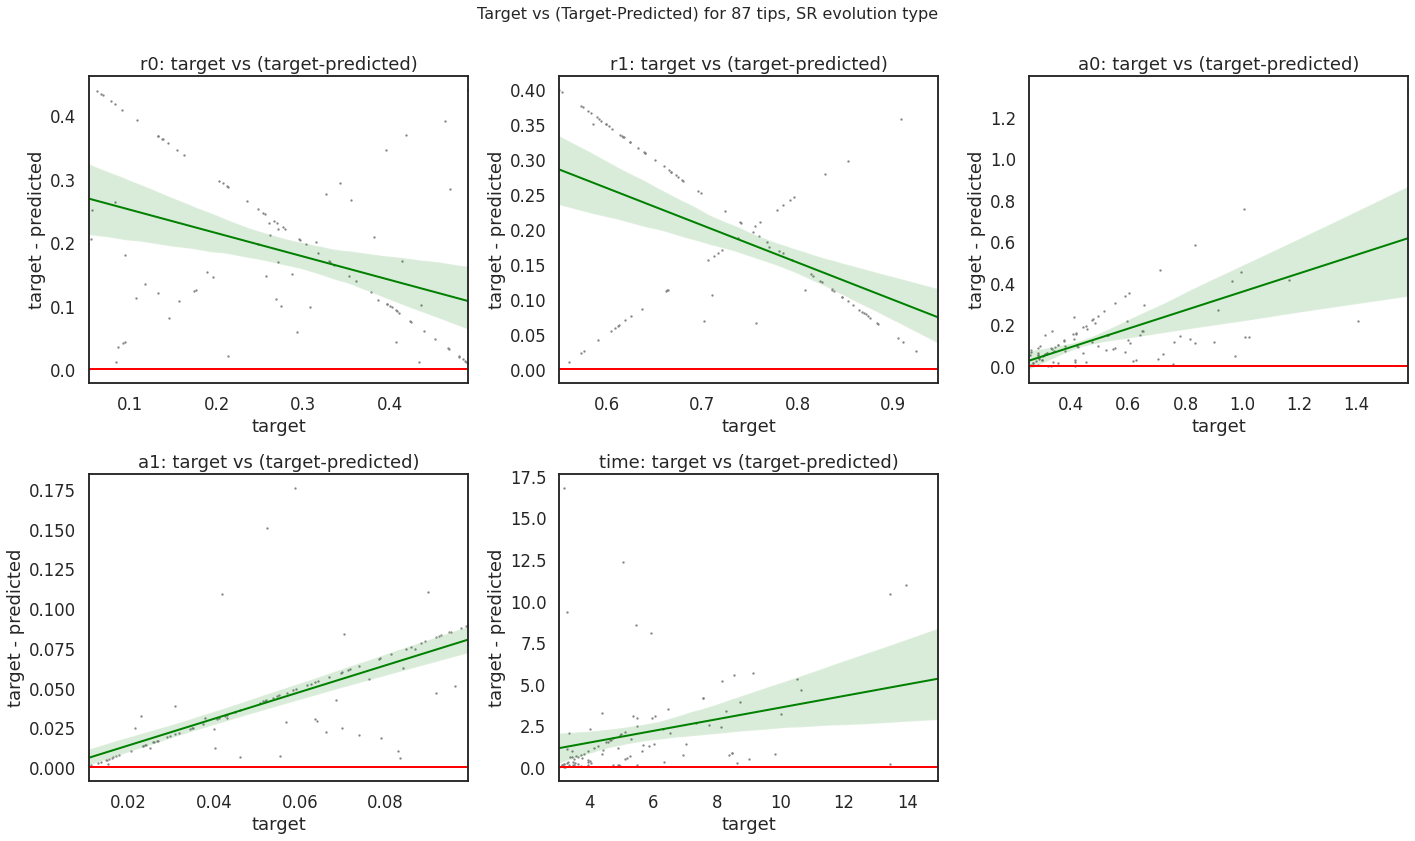

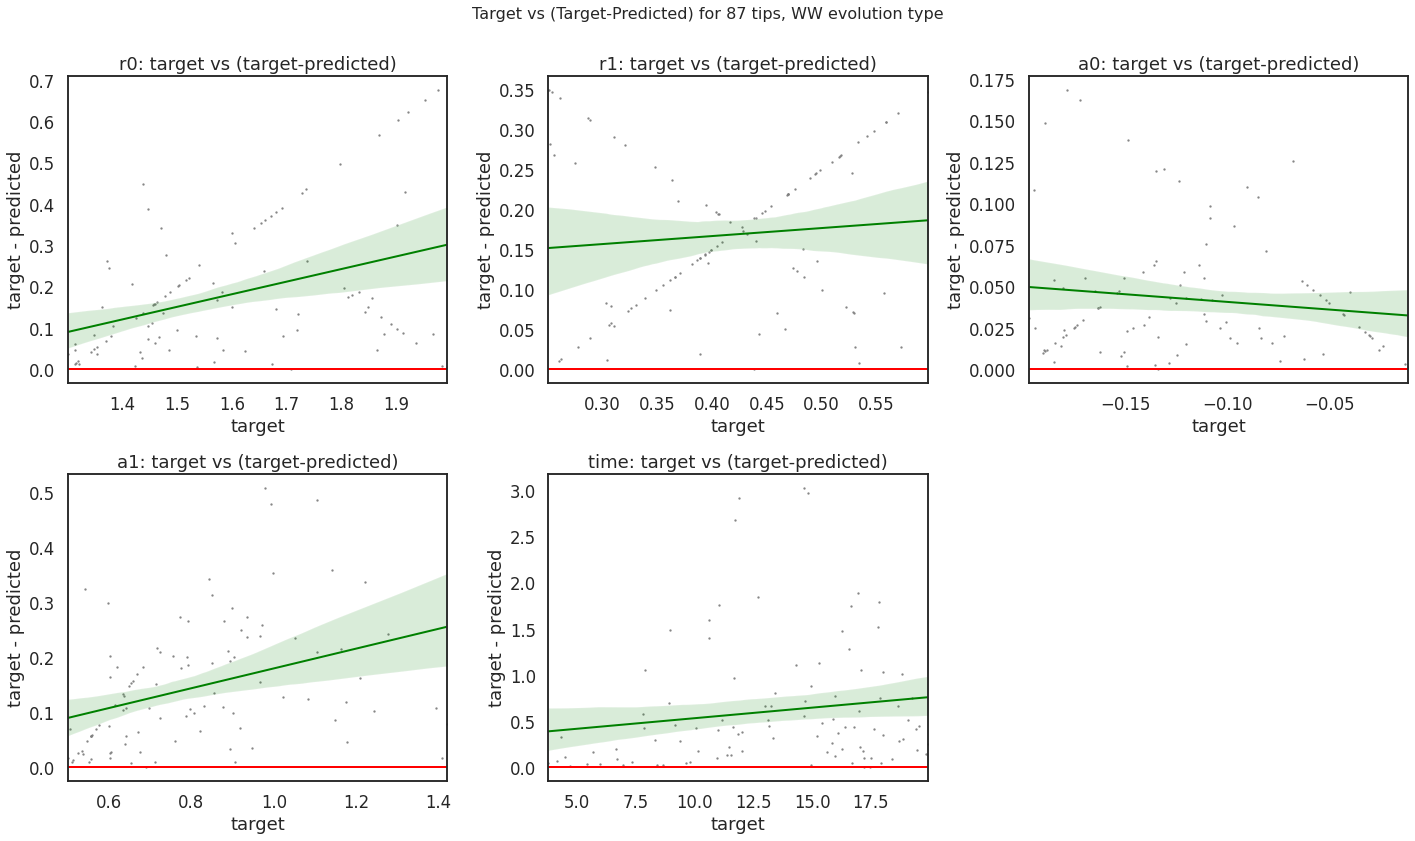

In [20]:
for tip in n_tips:
    for div in div_scenarios:
        predicted_minus_target_vs_target_MLE(inference_results, tip, div)    